# Plane wave decomposition (PWD)



The algoirhtm is extracted from: M. W. Fertig, «Vector Wave Propagation Method», Thesis, Mannheim, 2011. Chapter: 2.9 "Plane wave decomposition" pag. 41



In [46]:
from matplotlib import rcParams

rcParams['figure.dpi'] = 250


## XZ scheme

In [47]:
from diffractio import np, sp, plt, nm, um, mm, degrees
from diffractio.scalar_masks_XZ import Scalar_mask_XZ

from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_sources_X import Scalar_source_X


In [48]:
x0 = np.linspace(-25 * um, 25 * um, 2048)
z0 = np.linspace(0, 2*mm, 2048)
wavelength = 0.6328*um


In [49]:
u0 = Scalar_source_X(x0, wavelength)
u0.plane_wave(A=1)


In [50]:
t0 = Scalar_mask_X(x0, wavelength)
t0.slit(x0=0, size=40*um)


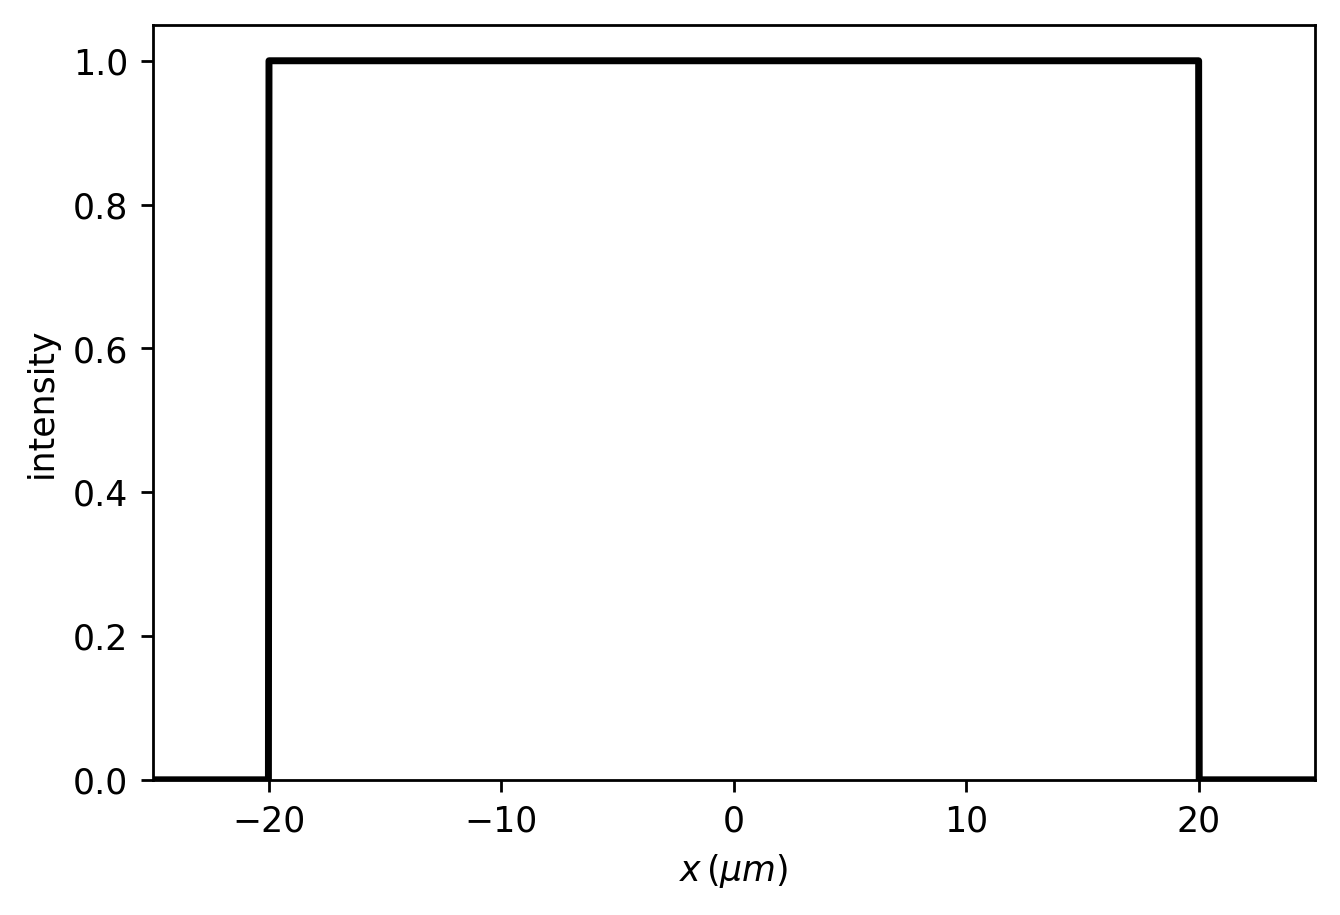

In [51]:
t1 = t0*u0
t1.draw()


In [52]:
u_xz = Scalar_field_XZ(x0, z0, wavelength, n_background=1)


In [53]:
u_xz.incident_field(t1)


In [54]:
u_xz.PWD(verbose=False)


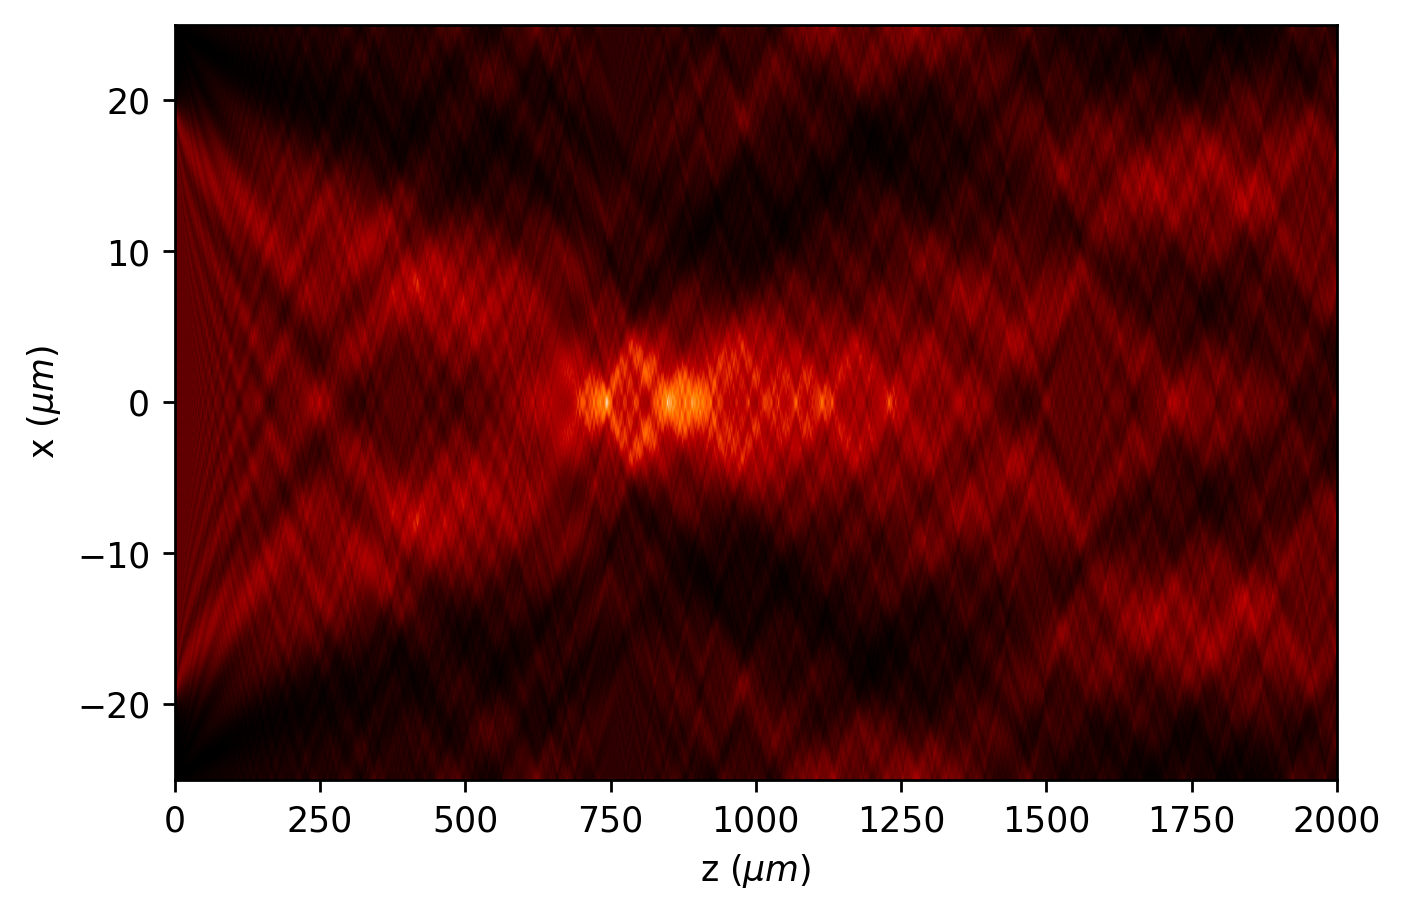

In [55]:
u_xz.draw()


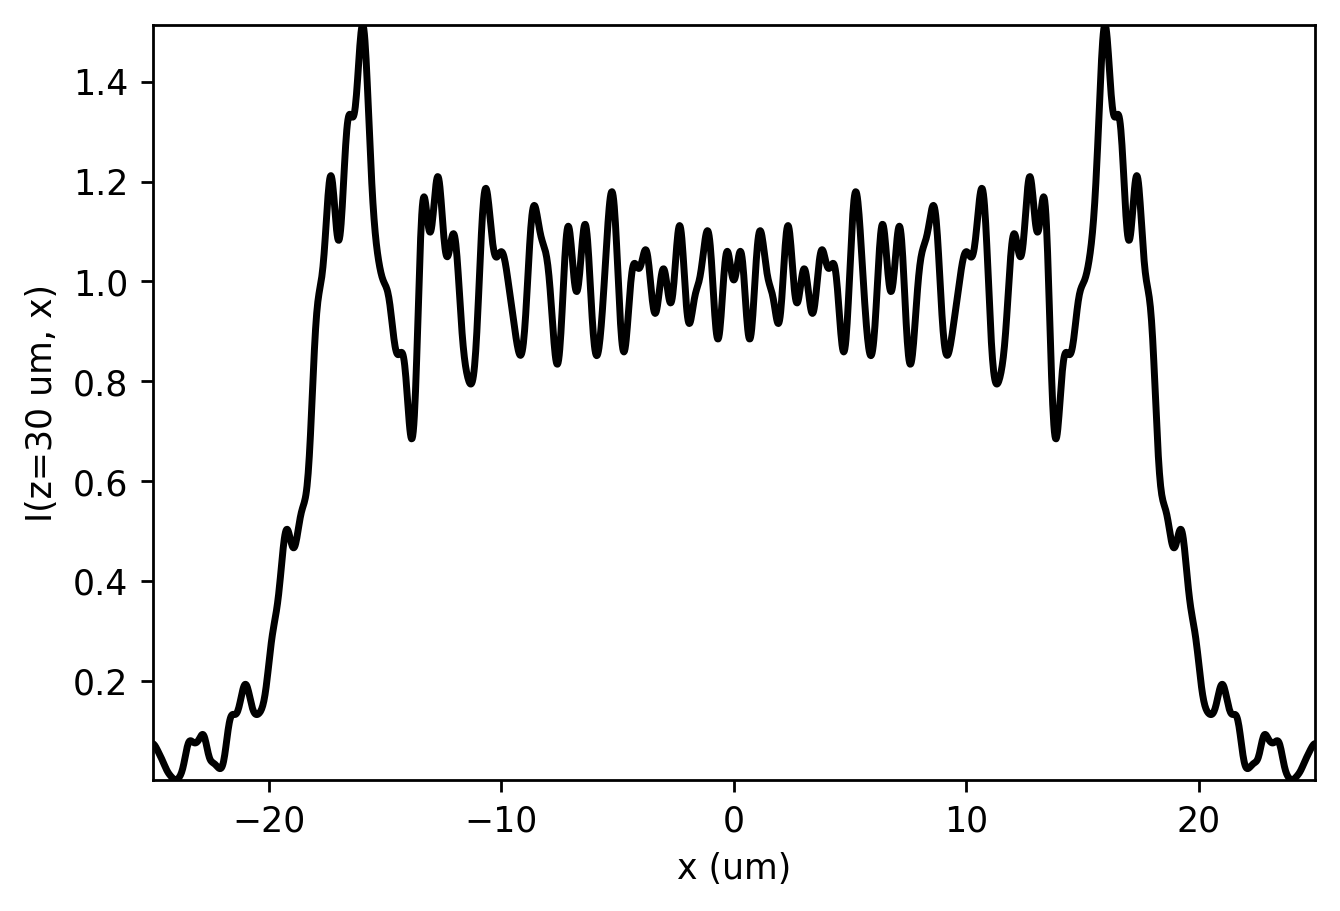

In [56]:
u_x = u_xz.profile_transversal(z0=30*um, draw=True)


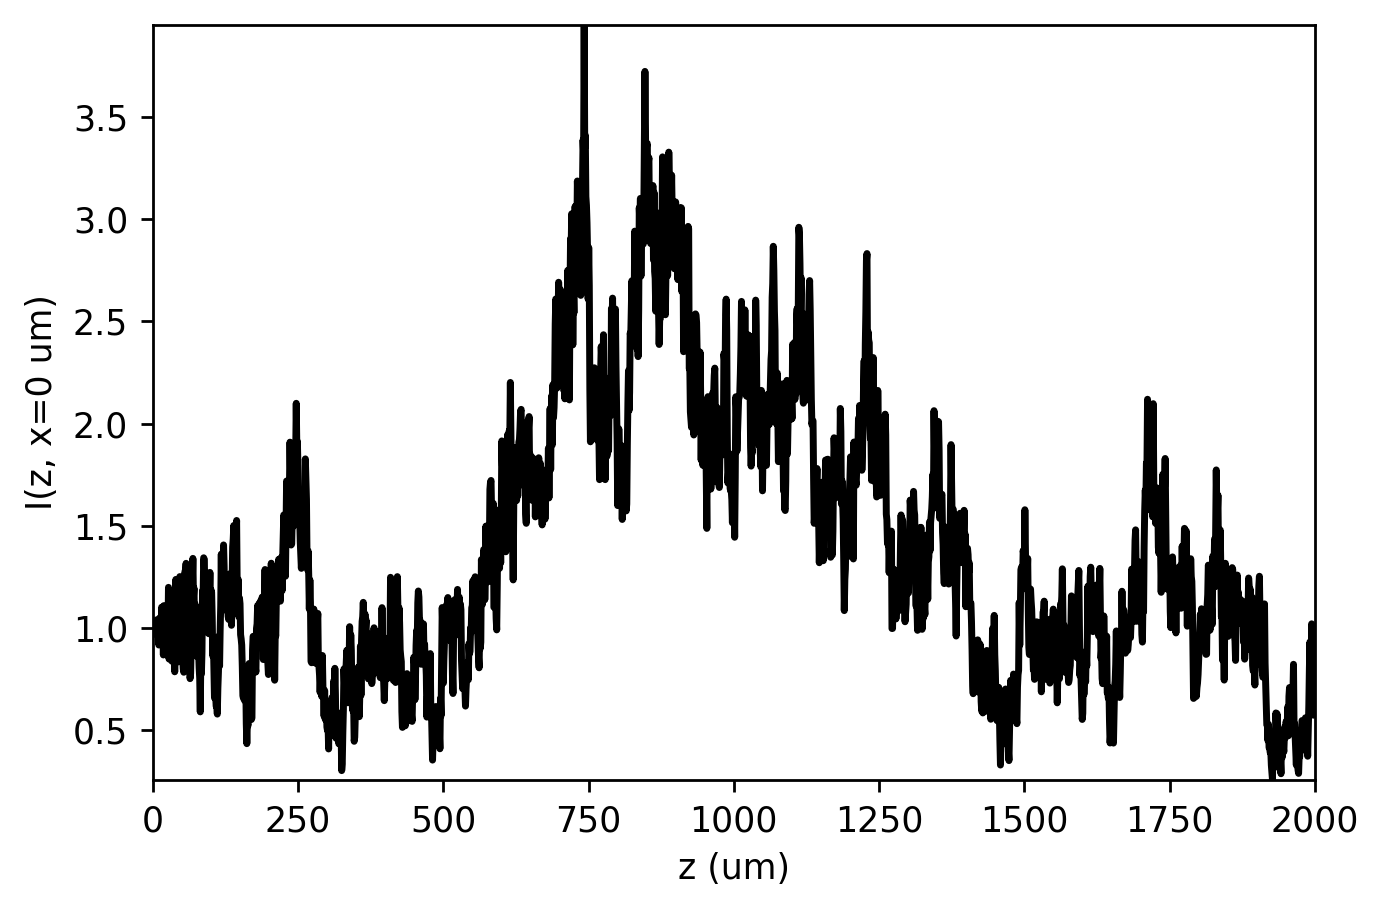

In [57]:
u_x = u_xz.profile_longitudinal(x0=0*um, draw=True)


## XYZ scheme

In [58]:
from diffractio import np, sp, plt, nm, um, mm, degrees
from diffractio.scalar_masks_XYZ import Scalar_mask_XYZ

from diffractio.scalar_fields_XYZ import Scalar_field_XYZ
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY


In [66]:
x0 = np.linspace(-20*um, 20*um, 256)
y0 = np.linspace(-20*um, 20*um, 256)
z0 = np.linspace(0, 300*um, 128)
wavelength = 0.6328*um


In [60]:
u0 = Scalar_source_XY(x0, y0, wavelength)
u0.plane_wave()

t0 = Scalar_mask_XY(x0, y0, wavelength)
t0.circle(r0=(0, 0), radius=(10, 10), angle=0 * degrees)

t1 = t0 * u0


In [61]:
u_xyz = Scalar_field_XYZ(x0, y0, z0, wavelength, n_background=1)


In [62]:
u_xyz.incident_field(t1)


In [63]:
% % time
u_xyz.PWD()


CPU times: user 1.34 s, sys: 73.7 ms, total: 1.42 s
Wall time: 1.42 s


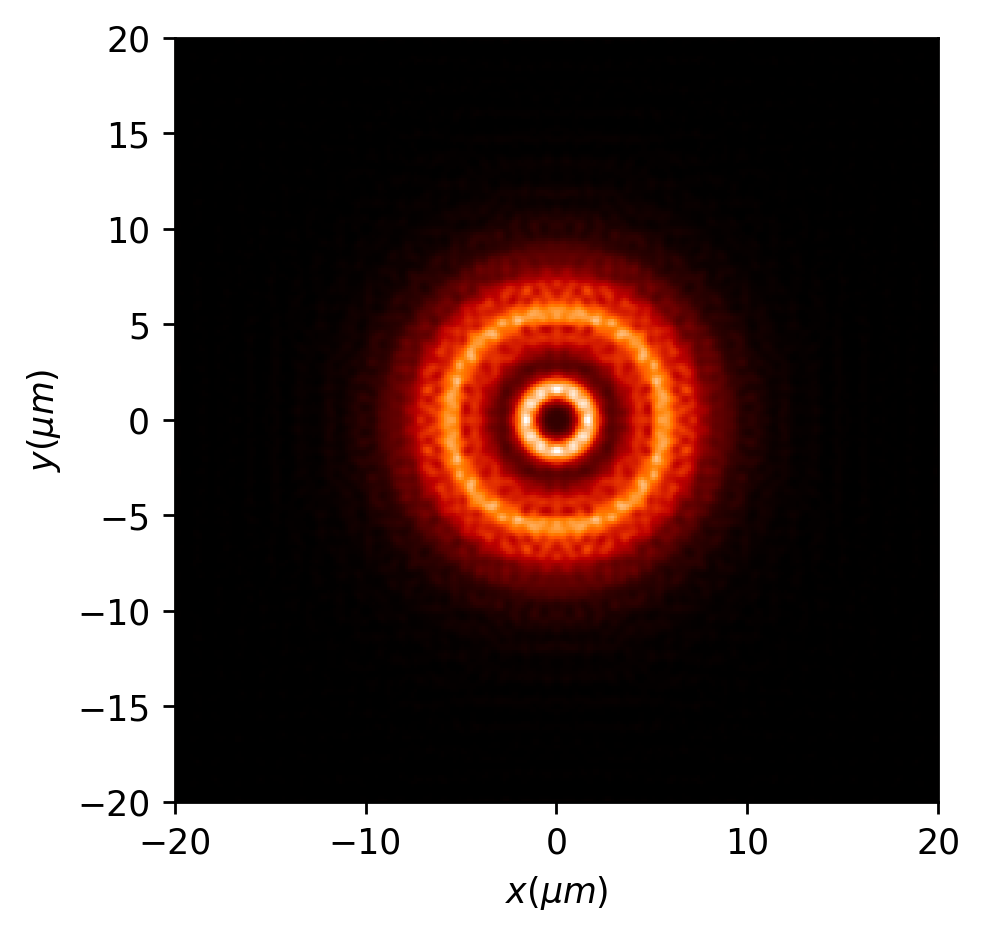

In [64]:
u_xyz.draw_XY(z0=40 * um)


<Figure size 1500x1000 with 0 Axes>

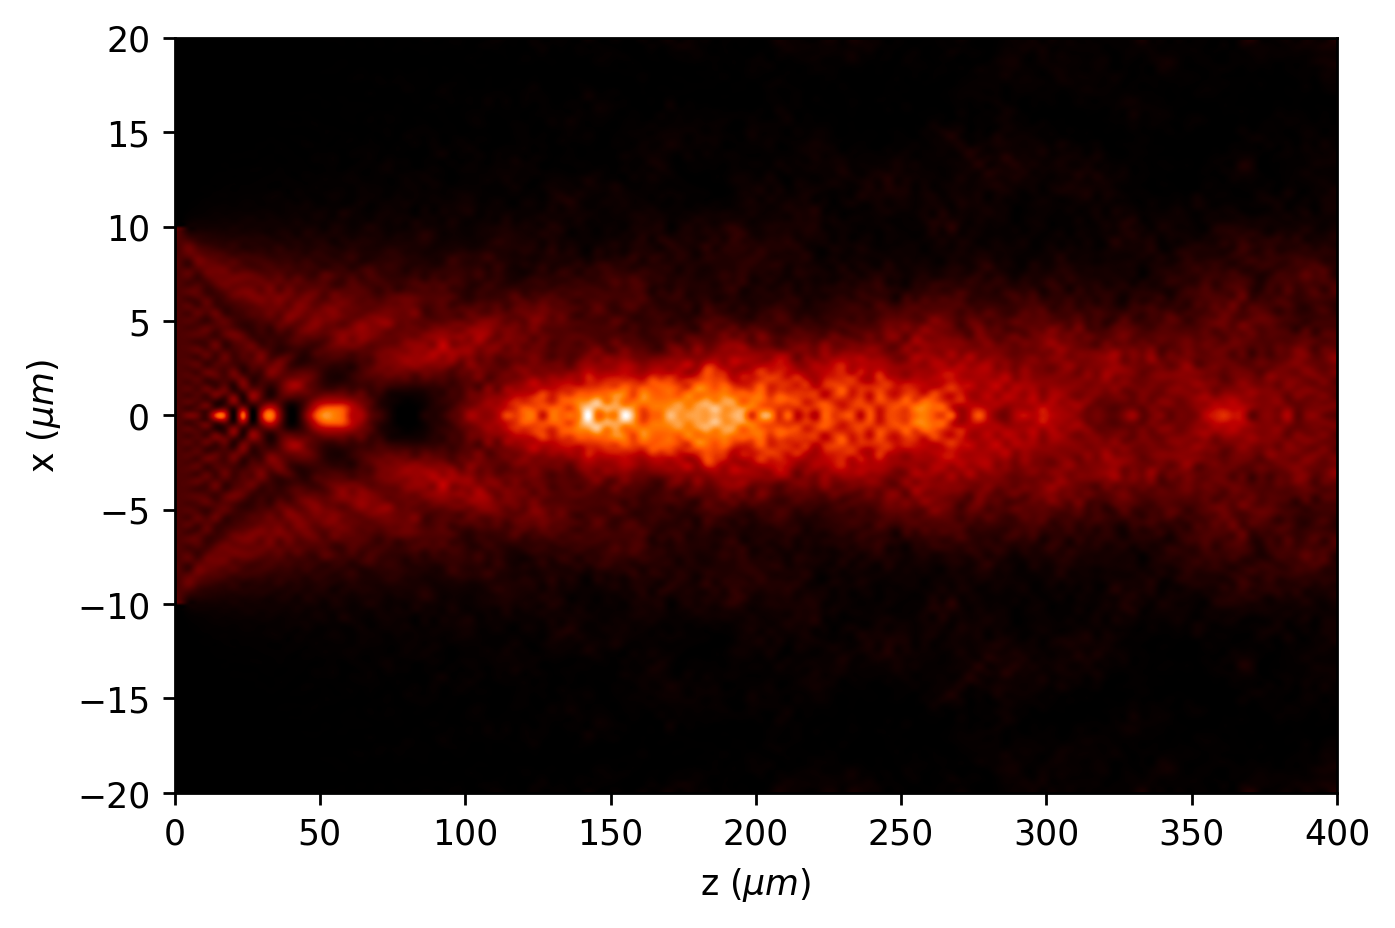

In [65]:
u_xyz.draw_XZ(y0=0)


This figure can be compared to Rayleigh-Sommerfeld approach. I do not use PWD very much.